In [ ]:
# Author - Kapil Kumar
# Date   - 6 Mar '24
# Title  - Implementing LTSM RNN Model 
# Version - Base Version V1.0

In [91]:
import pandas as pd
import numpy as np
from tensorflow import keras
#import seaborn as sb
#import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = '/content/gold_price_forecasting_working.csv'

In [3]:
gold_price_data = pd.read_csv(path)
gold_price_data

,Date,GoldPrice,S&P 500,S&P 500 Bond Index,US_10Y_TreasuryYield,Price(US_Oil_ETF),GBP/USD,Silver,JP10YBondYield
0,03/06/14,1244.5,1924.24,382.72,2.593,301.119995,1.674593,18.8700,0.18%
1,04/06/14,1244.3,1927.88,382.49,2.606,300.079987,1.674117,18.7600,0.18%
2,05/06/14,1253.3,1940.46,382.97,2.584,300.399994,1.674004,18.8100,0.18%
3,06/06/14,1252.5,1949.44,382.89,2.597,300.880005,1.681011,19.0300,0.18%
4,09/06/14,1253.9,1951.27,382.77,2.613,305.440002,1.680192,19.1100,0.18%
...,...,...,...,...,...,...,...,...,...
2386,04/01/24,2050.0,4688.68,489.36,3.991,67.570000,1.267427,23.0062,0.63%
2387,05/01/24,2049.8,4697.24,488.20,4.042,69.029999,1.268408,23.1909,0.61%
2388,08/01/24,2033.5,4763.54,490.10,4.002,66.400002,1.271779,23.0918,NaN
2389,09/01/24,2033.0,4756.50,490.36,4.019,67.389999,1.274519,22.9752,0.59%


In [17]:
gold_price_data['JP10YBondYield'] = gold_price_data['JP10YBondYield'].str.rstrip('%').astype('float')
gold_price_data

,Date,GoldPrice,S&P 500,S&P 500 Bond Index,US_10Y_TreasuryYield,Price(US_Oil_ETF),GBP/USD,Silver,JP10YBondYield
0,03/06/14,1244.5,1924.24,382.72,2.593,301.119995,1.674593,18.8700,0.18
1,04/06/14,1244.3,1927.88,382.49,2.606,300.079987,1.674117,18.7600,0.18
2,05/06/14,1253.3,1940.46,382.97,2.584,300.399994,1.674004,18.8100,0.18
3,06/06/14,1252.5,1949.44,382.89,2.597,300.880005,1.681011,19.0300,0.18
4,09/06/14,1253.9,1951.27,382.77,2.613,305.440002,1.680192,19.1100,0.18
...,...,...,...,...,...,...,...,...,...
2386,04/01/24,2050.0,4688.68,489.36,3.991,67.570000,1.267427,23.0062,0.63
2387,05/01/24,2049.8,4697.24,488.20,4.042,69.029999,1.268408,23.1909,0.61
2388,08/01/24,2033.5,4763.54,490.10,4.002,66.400002,1.271779,23.0918,NaN
2389,09/01/24,2033.0,4756.50,490.36,4.019,67.389999,1.274519,22.9752,0.59


In [23]:
gold_price_data['JP10YBondYield'] = gold_price_data['JP10YBondYield'].interpolate()

In [400]:
gold_price_data['Gold_ma3'] = gold_price_data["GoldPrice"].rolling(window=3).mean()

In [405]:
gold_price_data['Gold_ma3'] = gold_price_data["Gold_ma3"].bfill()

In [406]:
gold_price_data

,Date,GoldPrice,S&P 500,S&P 500 Bond Index,US_10Y_TreasuryYield,Price(US_Oil_ETF),GBP/USD,Silver,JP10YBondYield,Gold_ma3
0,03/06/14,1244.5,1924.24,382.72,2.593,301.119995,1.674593,18.8700,0.18,1247.366667
1,04/06/14,1244.3,1927.88,382.49,2.606,300.079987,1.674117,18.7600,0.18,1247.366667
2,05/06/14,1253.3,1940.46,382.97,2.584,300.399994,1.674004,18.8100,0.18,1247.366667
3,06/06/14,1252.5,1949.44,382.89,2.597,300.880005,1.681011,19.0300,0.18,1250.033333
4,09/06/14,1253.9,1951.27,382.77,2.613,305.440002,1.680192,19.1100,0.18,1253.233333
...,...,...,...,...,...,...,...,...,...,...
2386,04/01/24,2050.0,4688.68,489.36,3.991,67.570000,1.267427,23.0062,0.63,2055.400000
2387,05/01/24,2049.8,4697.24,488.20,4.042,69.029999,1.268408,23.1909,0.61,2047.533333
2388,08/01/24,2033.5,4763.54,490.10,4.002,66.400002,1.271779,23.0918,0.60,2044.433333
2389,09/01/24,2033.0,4756.50,490.36,4.019,67.389999,1.274519,22.9752,0.59,2038.766667


In [26]:
gold_price_data.isnull().any()

Date                    False
GoldPrice               False
S&P 500                 False
S&P 500 Bond Index      False
US_10Y_TreasuryYield    False
Price(US_Oil_ETF)       False
GBP/USD                  True
Silver                  False
JP10YBondYield          False
dtype: bool

In [27]:
gold_price_data['GBP/USD'] = gold_price_data['GBP/USD'].interpolate()
gold_price_data.isnull().any()

Date                    False
GoldPrice               False
S&P 500                 False
S&P 500 Bond Index      False
US_10Y_TreasuryYield    False
Price(US_Oil_ETF)       False
GBP/USD                 False
Silver                  False
JP10YBondYield          False
dtype: bool

In [30]:
gold_price_data.dtypes

Date                     object
GoldPrice               float64
S&P 500                 float64
S&P 500 Bond Index      float64
US_10Y_TreasuryYield    float64
Price(US_Oil_ETF)       float64
GBP/USD                 float64
Silver                  float64
JP10YBondYield          float64
dtype: object

## Problem statement - Given the data covering previous 6 days and sampled once per day , can we predict the gold price for next 1 day ?
### window_length = sequence_length = 6 days (Observations will go back 6 business days)
### sampling_rate = 1 ( 1 data point per day)
### delay = target for the sequence/window that starts at data[N] will be data[N+5] i.e data[N+ sequence_length]
### i.e = sampling_rate * (sequence_length + 1 -1)

In [407]:
window_length = sequence_length = 6
sampling_rate = 1
delay = sampling_rate * (sequence_length + 1 -1)
batch_size = 256

In [408]:
num_train_samples = int(0.8 * len(gold_price_data))
num_train_samples

1912

In [409]:
num_valid_samples = int(0.10 * len(gold_price_data))
num_valid_samples

239

In [410]:
num_test_samples = int(0.10* len(gold_price_data))
num_test_samples

239

In [411]:
gold_price_col = gold_price_data['GoldPrice']
gold_price_col

0       1244.5
1       1244.3
2       1253.3
3       1252.5
4       1253.9
         ...  
2386    2050.0
2387    2049.8
2388    2033.5
2389    2033.0
2390    2027.8
Name: GoldPrice, Length: 2391, dtype: float64

In [412]:
gold_price_array = np.array(gold_price_col)
gold_price_array

array([1244.5, 1244.3, 1253.3, ..., 2033.5, 2033. , 2027.8])

In [413]:
dates = pd.to_datetime(gold_price_data['Date'], infer_datetime_format='%d-%m-%Y')
dates

0      2014-03-06
1      2014-04-06
2      2014-05-06
3      2014-06-06
4      2014-09-06
          ...    
2386   2024-04-01
2387   2024-05-01
2388   2024-08-01
2389   2024-09-01
2390   2024-10-01
Name: Date, Length: 2391, dtype: datetime64[ns]

In [414]:
gold_price_data_copy = gold_price_data.copy()


In [415]:
dates_array = np.array(dates)
dates_array


array(['2014-03-06T00:00:00.000000000', '2014-04-06T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', ...,
       '2024-08-01T00:00:00.000000000', '2024-09-01T00:00:00.000000000',
       '2024-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [416]:
gold_price_data.iloc[:,1:]

,GoldPrice,S&P 500,S&P 500 Bond Index,US_10Y_TreasuryYield,Price(US_Oil_ETF),GBP/USD,Silver,JP10YBondYield,Gold_ma3
0,1244.5,1924.24,382.72,2.593,301.119995,1.674593,18.8700,0.18,1247.366667
1,1244.3,1927.88,382.49,2.606,300.079987,1.674117,18.7600,0.18,1247.366667
2,1253.3,1940.46,382.97,2.584,300.399994,1.674004,18.8100,0.18,1247.366667
3,1252.5,1949.44,382.89,2.597,300.880005,1.681011,19.0300,0.18,1250.033333
4,1253.9,1951.27,382.77,2.613,305.440002,1.680192,19.1100,0.18,1253.233333
...,...,...,...,...,...,...,...,...,...
2386,2050.0,4688.68,489.36,3.991,67.570000,1.267427,23.0062,0.63,2055.400000
2387,2049.8,4697.24,488.20,4.042,69.029999,1.268408,23.1909,0.61,2047.533333
2388,2033.5,4763.54,490.10,4.002,66.400002,1.271779,23.0918,0.60,2044.433333
2389,2033.0,4756.50,490.36,4.019,67.389999,1.274519,22.9752,0.59,2038.766667


In [417]:
raw_data = np.array(gold_price_data.iloc[:,1:])
raw_data

array([[1.24450000e+03, 1.92424000e+03, 3.82720000e+02, ...,
        1.88700000e+01, 1.80000000e-01, 1.24736667e+03],
       [1.24430000e+03, 1.92788000e+03, 3.82490000e+02, ...,
        1.87600000e+01, 1.80000000e-01, 1.24736667e+03],
       [1.25330000e+03, 1.94046000e+03, 3.82970000e+02, ...,
        1.88100000e+01, 1.80000000e-01, 1.24736667e+03],
       ...,
       [2.03350000e+03, 4.76354000e+03, 4.90100000e+02, ...,
        2.30918000e+01, 6.00000000e-01, 2.04443333e+03],
       [2.03300000e+03, 4.75650000e+03, 4.90360000e+02, ...,
        2.29752000e+01, 5.90000000e-01, 2.03876667e+03],
       [2.02780000e+03, 4.78345000e+03, 4.90790000e+02, ...,
        2.29085000e+01, 5.90000000e-01, 2.03143333e+03]])

In [418]:
train_dataset = keras.utils.timeseries_dataset_from_array(
   raw_data[:-delay],
   targets = gold_price_array[delay:],
   sampling_rate = sampling_rate,
   sequence_length = sequence_length,
   shuffle = False,
   batch_size = batch_size,
   start_index = 0,
   end_index = num_train_samples

)

In [419]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 9), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [420]:
for samples, targets in train_dataset:
   print("samples shape:", samples.shape)
   print("targets shape:", targets.shape)
   break

samples shape: (256, 6, 9)
targets shape: (256,)


In [421]:
val_dataset = keras.utils.timeseries_dataset_from_array(
   raw_data[:-delay],
   targets = gold_price_array[delay:],
   sampling_rate = sampling_rate,
   sequence_length = sequence_length,
   shuffle = False,
   batch_size = batch_size,
   start_index = num_train_samples,
   end_index = num_train_samples + num_valid_samples

)

In [422]:
test_dataset = keras.utils.timeseries_dataset_from_array(
   raw_data[:-delay],
   targets = gold_price_array[delay:],
   sampling_rate = sampling_rate,
   sequence_length = sequence_length,
   shuffle = False,
   batch_size = batch_size,
   start_index = num_train_samples + num_valid_samples,

)

In [423]:
for samples, targets in test_dataset:
   print("samples shape:", samples.shape)
   print("targets shape:", targets.shape)
   break

samples shape: (229, 6, 9)
targets shape: (229,)


In [424]:
for samples, targets in val_dataset:
   print("samples shape:", samples.shape)
   print("targets shape:", targets.shape)
   break

samples shape: (234, 6, 9)
targets shape: (234,)


In [425]:
df_training_x = gold_price_data.iloc[0:num_train_samples,1:]
df_training_y = gold_price_data.iloc[0:num_train_samples,1]
df_training_x


,GoldPrice,S&P 500,S&P 500 Bond Index,US_10Y_TreasuryYield,Price(US_Oil_ETF),GBP/USD,Silver,JP10YBondYield,Gold_ma3
0,1244.5,1924.24,382.72,2.593,301.119995,1.674593,18.870,0.18,1247.366667
1,1244.3,1927.88,382.49,2.606,300.079987,1.674117,18.760,0.18,1247.366667
2,1253.3,1940.46,382.97,2.584,300.399994,1.674004,18.810,0.18,1247.366667
3,1252.5,1949.44,382.89,2.597,300.880005,1.681011,19.030,0.18,1250.033333
4,1253.9,1951.27,382.77,2.613,305.440002,1.680192,19.110,0.18,1253.233333
...,...,...,...,...,...,...,...,...,...
1907,1832.0,4349.93,519.20,1.848,61.680000,1.351078,23.807,0.18,1843.733333
1908,1795.0,4326.51,519.88,1.807,61.860001,1.346801,22.676,0.18,1827.333333
1909,1786.6,4431.85,518.94,1.782,61.970001,1.338832,22.301,0.18,1804.533333
1910,1796.4,4515.55,518.87,1.782,62.480000,1.340339,22.393,0.18,1792.666667


In [426]:
df_training_y

0       1244.5
1       1244.3
2       1253.3
3       1252.5
4       1253.9
         ...  
1907    1832.0
1908    1795.0
1909    1786.6
1910    1796.4
1911    1801.5
Name: GoldPrice, Length: 1912, dtype: float64

In [427]:
df_training_x.shape, df_training_y.shape

((1912, 9), (1912,))

In [428]:
# Train Test Split
df_test_x = gold_price_data.iloc[num_train_samples:,1:]
df_test_y = gold_price_data.iloc[num_train_samples:,1]
df_test_x, df_test_y

(      GoldPrice  S&P 500  S&P 500 Bond Index  US_10Y_TreasuryYield  \
 1912     1810.3  4589.38              520.42                 1.766   
 1913     1804.1  4477.44              517.66                 1.827   
 1914     1807.8  4500.53              513.23                 1.930   
 1915     1821.8  4483.87              513.31                 1.916   
 1916     1827.9  4521.54              512.33                 1.954   
 ...         ...      ...                 ...                   ...   
 2386     2050.0  4688.68              489.36                 3.991   
 2387     2049.8  4697.24              488.20                 4.042   
 2388     2033.5  4763.54              490.10                 4.002   
 2389     2033.0  4756.50              490.36                 4.019   
 2390     2027.8  4783.45              490.79                 4.030   
 
       Price(US_Oil_ETF)   GBP/USD   Silver  JP10YBondYield     Gold_ma3  
 1912          62.520000  1.352539  22.7070            0.18  1802.73333

In [429]:
df_test_x.shape, df_test_y.shape

((479, 9), (479,))

In [430]:
# Scale the data
scaler = MinMaxScaler()
target_scaler = MinMaxScaler()


In [431]:
# Do fit / train and transform  of features data
scaler = scaler.fit(df_training_x)
df_training_x_minmax = scaler.transform(df_training_x)

df_test_x_minmax = scaler.transform(df_test_x)

print('Scaled training features 1st Row :')
print(df_training_x_minmax[0])

print('Scaled test features 1st Row:')
print(df_test_x_minmax[0])
#y_training_samples = scaler.fit_transform(y_training_samples)

Scaled training features 1st Row :
[0.19111591 0.03206761 0.00173816 0.76563071 0.95482656 0.92676798
 0.40224413 0.         0.18987939]
Scaled test features 1st Row:
[0.74593057 0.93018319 0.85653982 0.46325411 0.15286367 0.35842167
 0.61968718 0.         0.75119601]


In [432]:

df_training_y = np.array(df_training_y).reshape(-1,1)
df_training_y
df_training_y.shape



(1912, 1)

In [433]:
df_test_y = np.array(df_test_y).reshape(-1,1)
df_test_y
df_test_y.shape

(479, 1)

In [434]:
# Do transform  of target
target_scaler.fit(df_training_y)
df_training_y_minmax = target_scaler.transform(df_training_y)
#y_test_samples_minmax = scaler.transform(y_test_reshaped)
df_test_y_minmax  = target_scaler.transform(df_test_y)
print('Scaled training target :')
print(df_training_y_minmax[0] )

print('Scaled test target :')
print(df_test_y_minmax[0])

Scaled training target :
[0.19111591]
Scaled test target :
[0.74593057]


In [435]:
trainX = []; trainY = []
n_future = 1
n_past = window_length
type(trainX)

list

In [436]:
df_training_x_minmax[0:15], df_training_y_minmax[0:15]

(array([[1.91115905e-01, 3.20676129e-02, 1.73815879e-03, 7.65630713e-01,
         9.54826556e-01, 9.26767975e-01, 4.02244135e-01, 0.00000000e+00,
         1.89879388e-01],
        [1.90919788e-01, 3.32942429e-02, 3.10385499e-04, 7.70383912e-01,
         9.51330965e-01, 9.25927952e-01, 3.96010427e-01, 0.00000000e+00,
         1.89879388e-01],
        [1.99745048e-01, 3.75335301e-02, 3.29008629e-03, 7.62340037e-01,
         9.52406547e-01, 9.25728535e-01, 3.98843931e-01, 0.00000000e+00,
         1.89879388e-01],
        [1.98960581e-01, 4.05596668e-02, 2.79346949e-03, 7.67093236e-01,
         9.54019921e-01, 9.38094171e-01, 4.11311345e-01, 0.00000000e+00,
         1.92574624e-01],
        [2.00333399e-01, 4.11763517e-02, 2.04854429e-03, 7.72943327e-01,
         9.69346612e-01, 9.36648837e-01, 4.15844951e-01, 0.00000000e+00,
         1.95808908e-01],
        [2.06413022e-01, 4.10145982e-02, 0.00000000e+00, 7.80987203e-01,
         9.72035466e-01, 9.36998258e-01, 4.09611243e-01, 0.00000000

In [437]:
for i in range(n_past , len(df_training_x) - n_future + 1):
    trainX.append(df_training_x_minmax[i - n_past: i, 0:df_training_x_minmax.shape[1]])
    trainY.append(df_training_y_minmax[i+ n_future - 1:i+n_future, 0])


In [438]:
trainX, trainY = np.array(trainX), np.array(trainY)
print("TRAINX:", trainX)
print("TRAINY", trainY)

TRAINX: [[[1.91115905e-01 3.20676129e-02 1.73815879e-03 ... 4.02244135e-01
   0.00000000e+00 1.89879388e-01]
  [1.90919788e-01 3.32942429e-02 3.10385499e-04 ... 3.96010427e-01
   0.00000000e+00 1.89879388e-01]
  [1.99745048e-01 3.75335301e-02 3.29008629e-03 ... 3.98843931e-01
   0.00000000e+00 1.89879388e-01]
  [1.98960581e-01 4.05596668e-02 2.79346949e-03 ... 4.11311345e-01
   0.00000000e+00 1.92574624e-01]
  [2.00333399e-01 4.11763517e-02 2.04854429e-03 ... 4.15844951e-01
   0.00000000e+00 1.95808908e-01]
  [2.06413022e-01 4.10145982e-02 0.00000000e+00 ... 4.09611243e-01
   0.00000000e+00 1.98099859e-01]]

 [[1.90919788e-01 3.32942429e-02 3.10385499e-04 ... 3.96010427e-01
   0.00000000e+00 1.89879388e-01]
  [1.99745048e-01 3.75335301e-02 3.29008629e-03 ... 3.98843931e-01
   0.00000000e+00 1.89879388e-01]
  [1.98960581e-01 4.05596668e-02 2.79346949e-03 ... 4.11311345e-01
   0.00000000e+00 1.92574624e-01]
  [2.00333399e-01 4.11763517e-02 2.04854429e-03 ... 4.15844951e-01
   0.00000000e

In [439]:
testX = []; testY = []
for i in range(n_past , len(df_test_x) - n_future + 1):
    testX.append(df_test_x_minmax[i - n_past: i, 0:df_test_x_minmax.shape[1]])
    testY.append(df_test_y_minmax[i+ n_future - 1:i+n_future, 0])


In [440]:
testX, testY = np.array(testX), np.array(testY)
print("TESTX:", testX)
print("TESTY", testY)

TESTX: [[[0.74593057 0.93018319 0.85653982 ... 0.61968718 0.         0.75119601]
  [0.73985095 0.89246094 0.83940654 ... 0.60087272 0.         0.75379018]
  [0.74347911 0.90024196 0.81190639 ... 0.60653973 0.02       0.75591267]
  [0.7572073  0.89462776 0.812403   ... 0.64059844 0.02       0.75978708]
  [0.76318886 0.90732204 0.80631945 ... 0.64762552 0.03       0.7678054 ]
  [0.77171995 0.92944182 0.81196846 ... 0.655616   0.03       0.77750825]]

 [[0.73985095 0.89246094 0.83940654 ... 0.60087272 0.         0.75379018]
  [0.74347911 0.90024196 0.81190639 ... 0.60653973 0.02       0.75591267]
  [0.7572073  0.89462776 0.812403   ... 0.64059844 0.02       0.75978708]
  [0.76318886 0.90732204 0.80631945 ... 0.64762552 0.03       0.7678054 ]
  [0.77171995 0.92944182 0.81196846 ... 0.655616   0.03       0.77750825]
  [0.77250441 0.90143826 0.783413   ... 0.66587329 0.05       0.78276396]]

 [[0.74347911 0.90024196 0.81190639 ... 0.60653973 0.02       0.75591267]
  [0.7572073  0.89462776 0.

In [441]:
trainX.shape, trainY.shape

((1906, 6, 9), (1906, 1))

In [442]:
testX.shape, testY.shape

((473, 6, 9), (473, 1))

In [443]:
from tensorflow.keras import layers

In [444]:
# Define model
model = keras.models.Sequential()
model.add(layers.LSTM(64,activation='relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(layers.LSTM(64,activation='relu',return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(trainY.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 6, 64)             18944     
                                                                 
 lstm_46 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [453]:
# Fit model
history = model.fit(trainX, trainY, batch_size = 256, validation_split = 0.1, epochs = 15)

Epoch 1/15
7/7 [==============================] - 0s 49ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 2/15
7/7 [==============================] - 0s 41ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 3/15
7/7 [==============================] - 0s 42ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 4/15
7/7 [==============================] - 0s 44ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 5/15
7/7 [==============================] - 0s 37ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 6/15
7/7 [==============================] - 0s 41ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 7/15
7/7 [==============================] - 0s 63ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 8/15
7/7 [==============================] - 1s 76ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 9/15
7/7 [==============================] - 0s 71ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 10/15
7/7 [==============================] - 1s 76ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 11/15
7/7 [============

In [225]:
#raw_data.shape[-1]

In [455]:
model.evaluate(testX,testY)

15/15 [==============================] - 0s 6ms/step - loss: 0.0043


0.004252564627677202

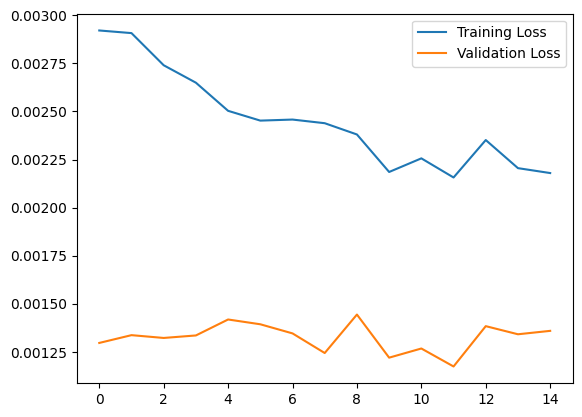

In [454]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [456]:
testX[-2:]

array([[[1.0023534 , 0.99099236, 0.69886399, 1.23107861, 0.1667451 ,
         0.21875899, 0.68121387, 0.45      , 1.03426319],
        [1.00392234, 0.98189373, 0.68259979, 1.26032907, 0.1637873 ,
         0.21784308, 0.67346707, 0.45      , 1.02762617],
        [0.97391645, 0.96908151, 0.67968217, 1.24606947, 0.17192122,
         0.19918433, 0.63556613, 0.45      , 1.01391416],
        [0.98097666, 0.96364592, 0.66372835, 1.27678245, 0.16983732,
         0.20821987, 0.63664287, 0.45      , 1.00656964],
        [0.98078055, 0.96653052, 0.65652741, 1.29542962, 0.17474455,
         0.2099511 , 0.64710983, 0.43      , 0.99861869],
        [0.96479702, 0.98887271, 0.66832206, 1.28080439, 0.16590482,
         0.21590009, 0.64149382, 0.42      , 0.99548548]],

       [[1.00392234, 0.98189373, 0.68259979, 1.26032907, 0.1637873 ,
         0.21784308, 0.67346707, 0.45      , 1.02762617],
        [0.97391645, 0.96908151, 0.67968217, 1.24606947, 0.17192122,
         0.19918433, 0.63556613, 0.45   

In [461]:
# Forecast
forecast = model.predict(testX[-1:])

1/1 [==============================] - 0s 41ms/step


In [462]:
forecast

array([[0.99967194]], dtype=float32)

In [463]:
y_pred_future = target_scaler.inverse_transform(forecast)

In [464]:
y_pred_future

array([[2069.0657]], dtype=float32)